# Google Play Store Apps EDA

## Library Used
- Numpy
- Pandas
- Matplotlib
- Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [2]:
df = pd.read_csv("googleplaystore.csv")
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
#Columns with space are Renamed
df.rename(columns = {"Content Rating":"Content_Rating", "Last Updated":"Last_Updated", "Current Ver":"Current_Ver", "Android Ver":"Android_Ver"}, inplace=True)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [7]:
df[df.Category == "1.9"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df.drop(10472, axis = 0, inplace = True)

In [9]:
df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
Name: Category, dtype: int64

In [10]:
#df["Category"] = pd.factorize(df.Category)[0]

In [11]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
Ap = df[df.Rating.isnull()].App
reviewsAp = reviews.App.unique()
for i in Ap:
    if i in reviewsAp:
        print(i)

Blood Pressure


In [13]:
df[df.App == "Blood Pressure"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2310,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
2513,Blood Pressure,MEDICAL,NaN,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6585,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up


In [14]:
df.iloc[2513, 2] = df[df.App == "Blood Pressure"].Rating.mean()
df[df.App == "Blood Pressure"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2310,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up
2513,Blood Pressure,MEDICAL,4.2,10,2.4M,"1,000+",Free,0,Everyone,Medical,"March 14, 2015",1.0,2.3 and up
6585,Blood Pressure,MEDICAL,4.2,33033,7.4M,"5,000,000+",Free,0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up


In [15]:
df.drop(list(df[df.Rating.isnull()].index), inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content_Rating  9367 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last_Updated    9367 non-null   object 
 11  Current_Ver     9363 non-null   object 
 12  Android_Ver     9365 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [17]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [18]:
lds = np.array(df.Size.str.find('k'))
ls = np.where(lds>0)

In [19]:
df.Size = df.Size.str.replace('M','')
df.Size = df.Size.str.replace('k','')

In [20]:
df.Size.unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '7.0', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4',
       '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6',
       '7.1', '22', '6.4', '3.2', '8.2', '4.9', '9.5', '5.0', '5.9', '13',
       '73', '6.8', '3.5', '4.0', '2.3', '2.1', '42', '9.1', '55', '7.3',
       '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3', '4.3',
       '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66', '79',
       '8.4', '3.7', '118', '44', '695', '1.6', '6.2', '53', '1.4', '3.0',
       '7.2', '5.8', '3.8', '9.6', '45', '63', '49', '77', '4.4', '70',
       '9.3', '8.1', '36', '6.9', '7.4', '84', '97', '2.0', '1

In [21]:
df_temp = df.copy()

In [22]:
df_temp.drop(df[df.Size == 'Varies with device'].index,axis=0, inplace=True)

In [23]:
df_temp.Size = df_temp.Size.astype('float') 


In [24]:
df.reset_index(False,inplace=True)

In [25]:
df.drop('index',axis=1, inplace=True)

In [26]:
for i,j in df.iterrows():
    if j.Size == "Varies with device":
        cat = j.Category
        df.iloc[i, 4] = df_temp.groupby('Category').Size.median()[cat]
    

In [27]:
df.Size = df.Size.astype("float")

In [28]:
for x in ls:
    df.iloc[x,4]=df.iloc[x,4]*0.001

In [29]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2697,BeautyPlus - Easy Photo Editor & Selfie Camera,PHOTOGRAPHY,4.4,3158047,53.0,"100,000,000+",Free,0,Everyone,Photography,"July 31, 2018",6.9.031,4.1 and up
1349,My Diet Diary Calorie Counter,HEALTH_AND_FITNESS,4.1,18539,57.0,"1,000,000+",Free,0,Everyone,Health & Fitness,"July 30, 2018",1.11.4,4.0.3 and up
3467,Classical music for baby,PARENTING,4.8,1940,38.0,"100,000+",Free,0,Everyone,Parenting;Music & Video,"July 18, 2018",1.04,4.2 and up
7085,Easy Cv maker 2018,BOOKS_AND_REFERENCE,3.9,88,5.3,"10,000+",Free,0,Everyone,Books & Reference,"March 31, 2018",1.1,4.0 and up
8087,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,"1,000,000+",Paid,$0.99,Everyone 10+,Action,"August 3, 2018",2.3.24,4.1 and up


In [30]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [31]:
df.Installs = df.Installs.str.replace("+", "")
df.Installs = df.Installs.str.replace(",", "")

In [32]:
df.Installs = df.Installs.astype("int")

In [33]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
5204,Dungeon Hunter 5 – Action RPG,FAMILY,4.2,720685,51.0,10000000,Free,0,Teen,Role Playing,"June 21, 2018",3.6.1a,4.0.3 and up
5908,Hungry Girl Diet Bk. Companion,HEALTH_AND_FITNESS,2.2,4,28.0,1000,Free,0,Everyone,Health & Fitness,"February 1, 2018",1.1.3,4.0 and up
520,"Meet24 - Love, Chat, Singles",DATING,4.2,57081,7.9,1000000,Free,0,Mature 17+,Dating,"July 27, 2018",1.31.3,4.0.3 and up
9102,Sat-Fi,COMMUNICATION,3.6,97,11.0,5000,Free,0,Everyone,Communication,"August 31, 2017",Varies with device,Varies with device
4024,Helix Jump,GAME,4.2,1485806,33.0,100000000,Free,0,Everyone,Action,"April 9, 2018",1.0.6,4.1 and up


## Data Cleaning

In [34]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [35]:
df.Price = df.Price.str.replace("$", "")

In [36]:
df.Price = df.Price.astype("float")

In [37]:
df.sample()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
6282,BW-Joseki,GAME,4.7,705,1.8,10000,Free,0.0,Everyone,Board,"July 28, 2015",1.2.1,4.0.3 and up


In [38]:
temp = np.array(df.Genres.str.find(';'))
ls = np.where(temp>0)

In [39]:
df2 = df.iloc[np.r_[ls],:]

In [40]:
print(df.shape)
print(df2.shape)

(9367, 13)
(483, 13)


In [41]:
df.iloc[ls[0][0:4],:]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
25,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up


In [42]:
df.Genres = df.Genres.apply(lambda x: x.split(';')[0])

In [43]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
25,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
35,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up


In [44]:
df2.Genres = df2.Genres.apply(lambda x: x.split(';')[1])

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [45]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Creativity,"July 3, 2018",2.8,4.0.3 and up
25,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000,Free,0.0,Everyone,Creativity,"October 11, 2017",1.0.8,4.0.3 and up
35,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000,Free,0.0,Everyone,Creativity,"August 2, 2018",1.0.9,4.4 and up


In [46]:
df = df.append(df2, ignore_index=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9850 non-null   object 
 1   Category        9850 non-null   object 
 2   Rating          9850 non-null   float64
 3   Reviews         9850 non-null   object 
 4   Size            9850 non-null   float64
 5   Installs        9850 non-null   int32  
 6   Type            9850 non-null   object 
 7   Price           9850 non-null   float64
 8   Content_Rating  9850 non-null   object 
 9   Genres          9850 non-null   object 
 10  Last_Updated    9850 non-null   object 
 11  Current_Ver     9846 non-null   object 
 12  Android_Ver     9848 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 962.0+ KB


In [48]:
df.drop("Android_Ver",axis = 1, inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9850 entries, 0 to 9849
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9850 non-null   object 
 1   Category        9850 non-null   object 
 2   Rating          9850 non-null   float64
 3   Reviews         9850 non-null   object 
 4   Size            9850 non-null   float64
 5   Installs        9850 non-null   int32  
 6   Type            9850 non-null   object 
 7   Price           9850 non-null   float64
 8   Content_Rating  9850 non-null   object 
 9   Genres          9850 non-null   object 
 10  Last_Updated    9850 non-null   object 
 11  Current_Ver     9846 non-null   object 
dtypes: float64(3), int32(1), object(8)
memory usage: 885.1+ KB


In [50]:
df[df.Current_Ver == "Varies with device"].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device
36,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,9.2,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device
41,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,9.2,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device
51,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,17.0,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device
66,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,17.0,5000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device


In [51]:
ind = df[df['Current_Ver']=='Varies with device'].index

In [52]:
df_v = df.copy()

In [53]:
df_v.drop(ind, axis = 0, inplace = True)

In [54]:
df_v.Current_Ver.mode()

0    1.0
dtype: object

In [55]:
df.Current_Ver = df.Current_Ver.replace("Varies with device", "1.0")

In [56]:
df.drop_duplicates(keep='first', inplace=True)

In [57]:
df.reset_index(inplace=True)
df.drop('index',axis=1, inplace=True)

## Final Prepared Data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9296 entries, 0 to 9295
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9296 non-null   object 
 1   Category        9296 non-null   object 
 2   Rating          9296 non-null   float64
 3   Reviews         9296 non-null   object 
 4   Size            9296 non-null   float64
 5   Installs        9296 non-null   int32  
 6   Type            9296 non-null   object 
 7   Price           9296 non-null   float64
 8   Content_Rating  9296 non-null   object 
 9   Genres          9296 non-null   object 
 10  Last_Updated    9296 non-null   object 
 11  Current_Ver     9292 non-null   object 
dtypes: float64(3), int32(1), object(8)
memory usage: 835.3+ KB


In [59]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",1.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,"June 20, 2018",1.1


# Exploration of Data Columns


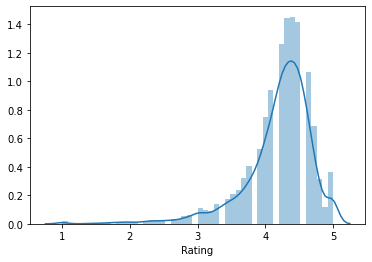

In [60]:
sns.distplot(df.Rating)

# Seaborn Bar Plot

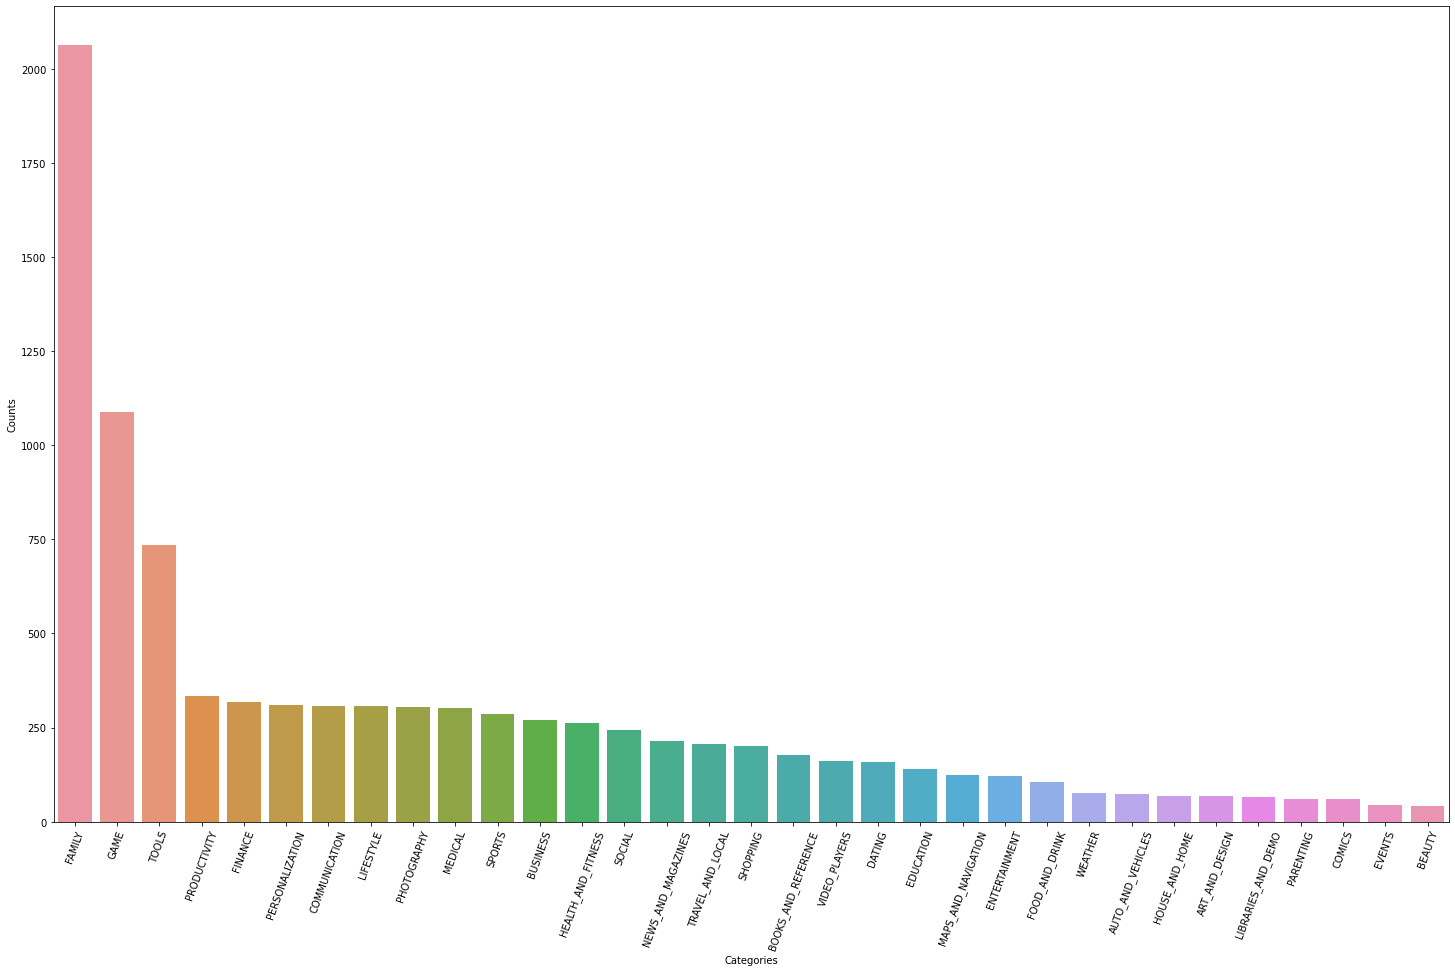

In [61]:
df2 = pd.DataFrame(columns = ["Categories"])
df2["Categories"] = [each for each in df.Category.value_counts().index]
df2["Counts"] = [cnt for cnt in df.Category.value_counts().values]
df2 = df2.sort_values(by = ["Counts"], ascending = False)

plt.figure(figsize = (25,15))
sns.barplot(x = df2.Categories, y = df2.Counts)
plt.xticks(rotation = 70)
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.show()

# Pie plot

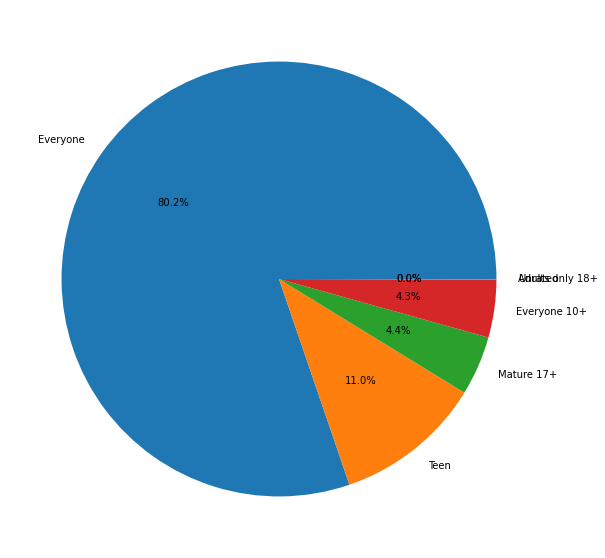

In [62]:
labels = df.Content_Rating.value_counts().index
values = df.Content_Rating.value_counts().values

plt.figure(figsize = (10,10))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.show()

[]

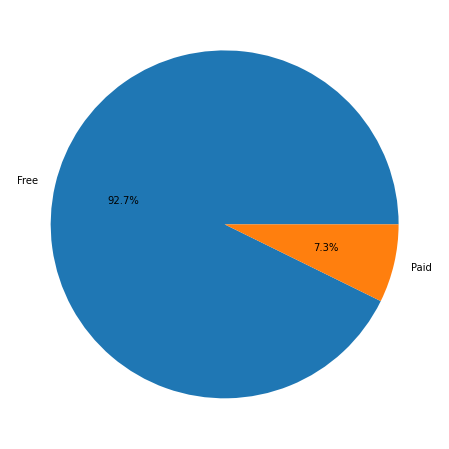

In [63]:
labels = df.Type.value_counts().index
values = df.Type.value_counts().values

plt.figure(figsize = (8,8))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.plot()

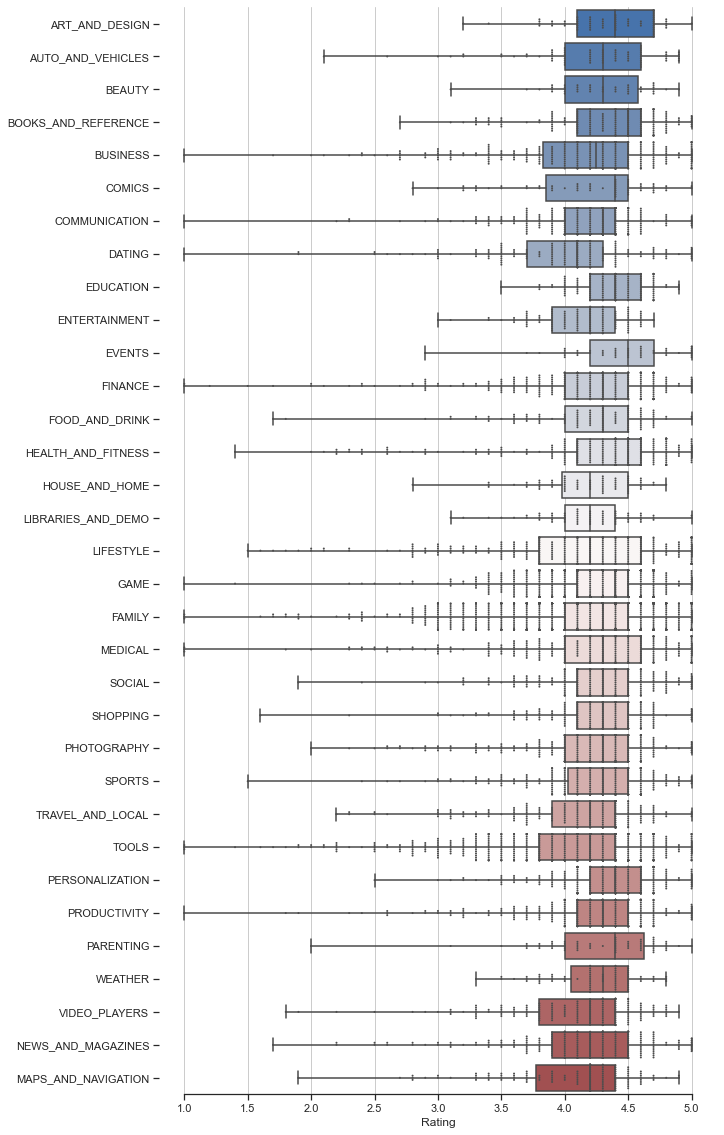

In [64]:
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(10, 20))


df3 = df.copy()
df3 = df3[["Category","Rating"]]

sns.boxplot(x="Rating", y="Category", data=df3,
            whis=[0, 100], palette="vlag")

sns.swarmplot(x="Rating", y="Category", data=df3,
              size=2, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

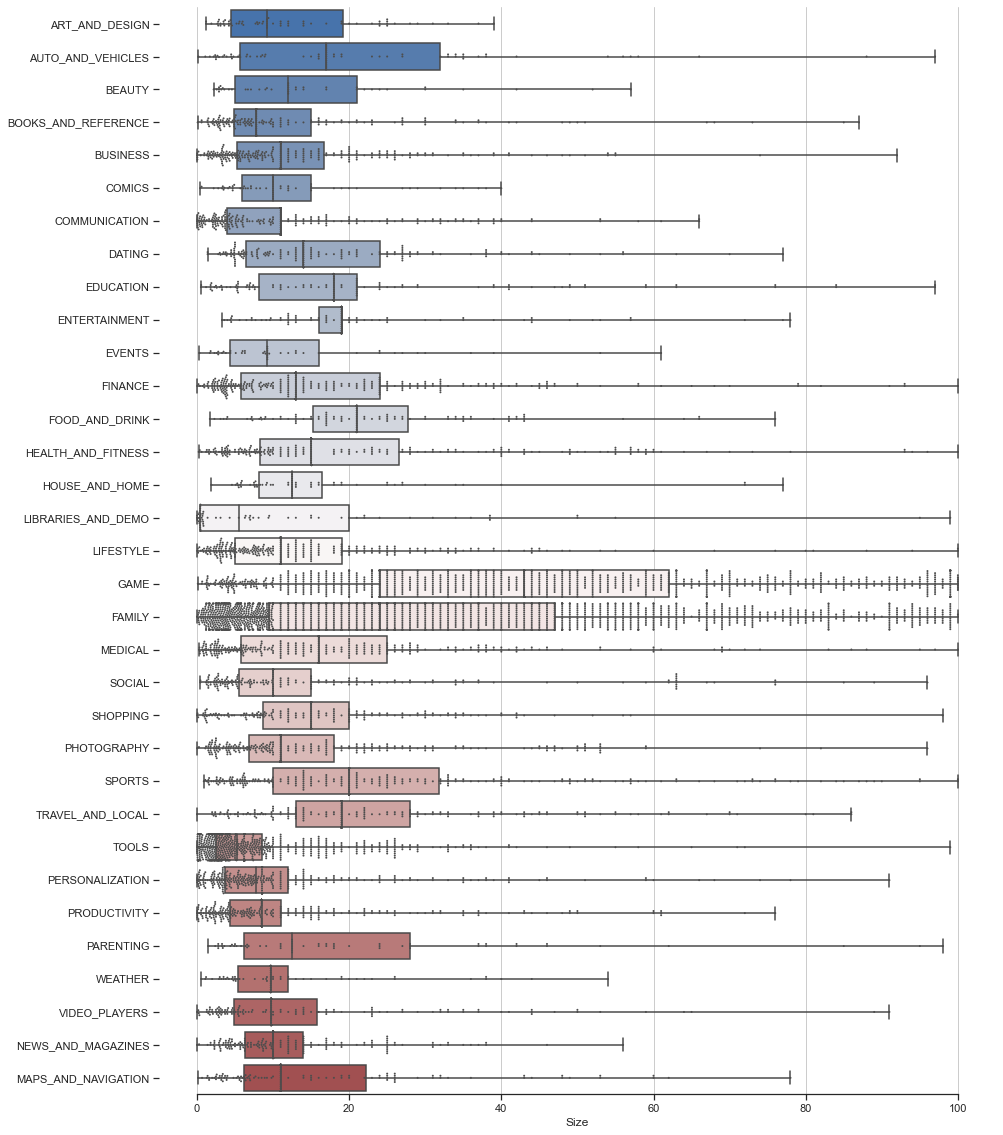

In [65]:
sns.set(style="ticks")

f, ax = plt.subplots(figsize=(15, 20))


df4 = df.copy()
df4 = df4[["Category","Size"]]

sns.boxplot(x="Size", y="Category", data=df4,
            whis=[0, 100], palette="vlag")

sns.swarmplot(x="Size", y="Category", data=df4,
              size=2, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)